# K-space Encoding

MRI is a so-called Fourier imaging technique, where data is acquired in the Fourier Transform domain.  The Fourier Transform domain is referred to as "k-space".  This section describes the how to characterize MRI spatial encoding using k-space, including frequency encoding, phase encoding and other k-space trajectories.

## Learning Goals

1. Describe how images are formed
    * Understand how frequency encoding works
    * Understand how phase encoding works
    * Describe what a k-space trajectory is

## Cartesian K-space (Frequency and Phase encoding, or FT Imaging)

By far the most common way to perform spatial encoding is using a Cartesian k-space trajectory, which the name refers to the fact that data is sampled on a regularly spaced grid in k-space.
This is also known FT imaging, since we reconstruct images with a 2D Fourier Transform.

It consists of 2 types of encoding:
1. Frequency encoding - one dimension is encoded using a constant gradient applied during data acquisition
1. Phase encoding - additional dimensions are encoded using gradient applied before data acquisition.  This gradient is incremented to provide complete spatial encoding.  Phase encoding is applied in 1 dimension for 2D imaging, and 2 dimensions for 3D imaging

### Frequency Encoding

Typically 1 dimension of the object is encoded using "frequency encoding".  This means that, after RF excitation, a magnetic field gradient is turned on and the signal is read out.  The frequencies present in the signal correspond to given spatial locations.  By convention, this is applied in the x-direction (but in practice can be rotated to any direction);

$$f = \bar \gamma G_{xr} x$$
where $G_{xr}$ is the readout gradient amplitude.  Therefore, the position is proportional to the frequency:

$$ x = \frac{f}{\bar \gamma G_{xr}}$$

From frequency encoding data alone, a 1D image can be reconstructed with an inverse Fourier Transform

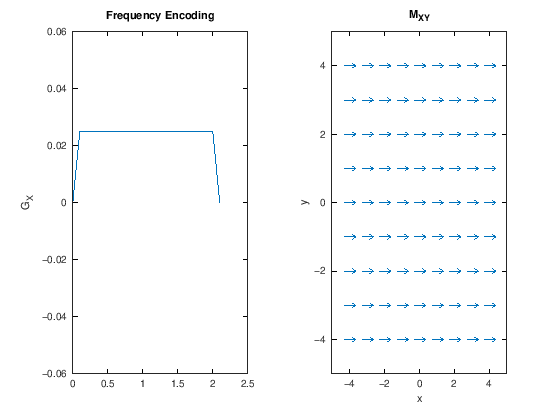

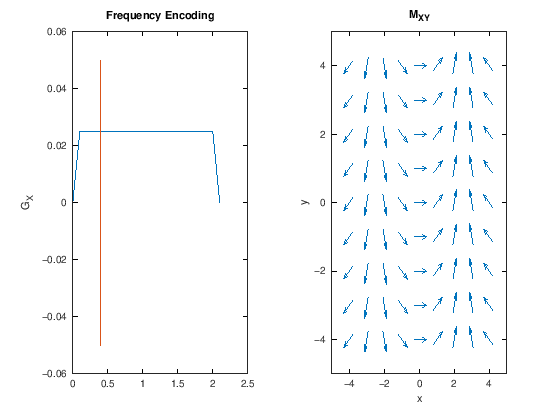

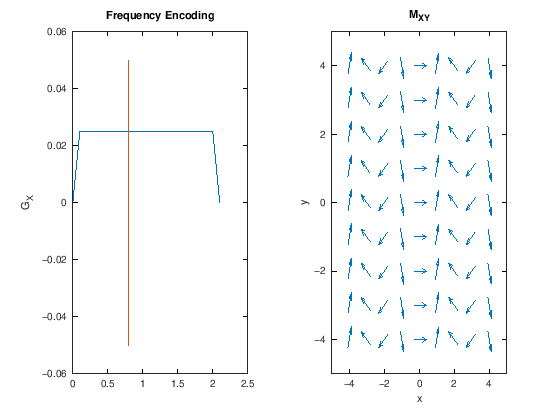

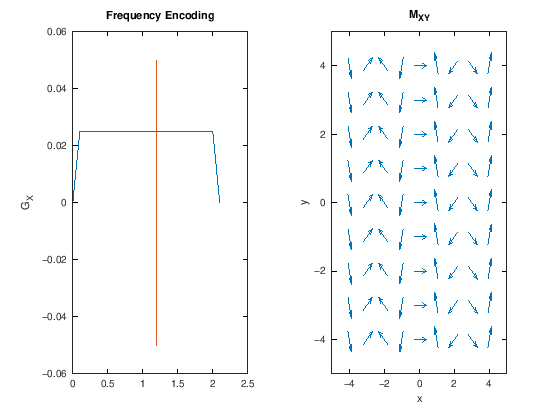

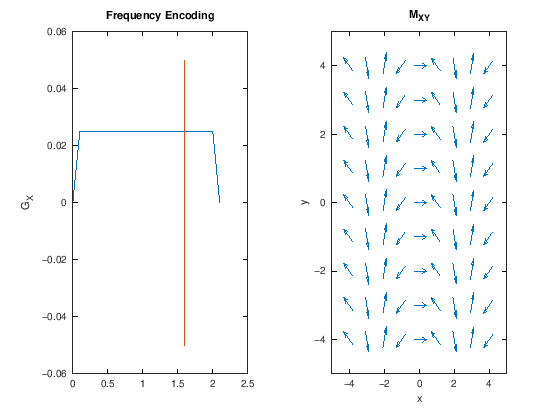

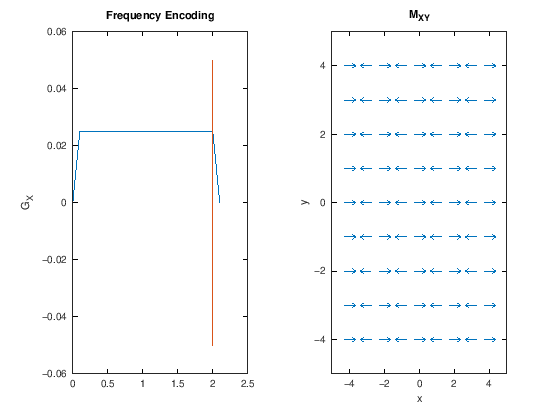

In [1]:
% simulate frequency encoding
N = 8;
Mxy= ones(N+1,N+1);

x = [-N/2:N/2];
[x,y] = meshgrid(x,x);
Splot = 0.5;

kFE = 1/2;
dt = 0.1;
Tfe = 2;

GAMMA = 42.58;


for tfe = linspace(0,1,6)*Tfe
    phase_x = 2*pi*kFE*x *tfe/Tfe;
        
    Mxy_FE = Mxy .* exp(i*phase_x);
        
    figure
    subplot(121), plot([0:dt:Tfe+dt],  [0, ones(1,Tfe/dt)*kFE/(Tfe/dt), 0], tfe*ones(1,2), [-0.05 0.05]), ylabel('G_X')
    title('Frequency Encoding')
    subplot(122)
    quiver(x-real(Mxy_FE)*Splot/2,y-imag(Mxy_FE)*Splot/2,real(Mxy_FE), imag(Mxy_FE), Splot)
    xlabel('x'), ylabel('y')
    xlim([-N/2-1, N/2+1])
    ylim([-N/2-1, N/2+1])
    title('M_{XY}')
    drawnow
end



## Phase Encoding

Typically the 2nd (and optionally 3rd) dimensions of the object are encoded using "phase encoding".  This means that, after RF excitation but before the frequency encoding gradient, a pulsed gradient is applied such that the location is encoded in the phase of the next magnetization:

$$ \Phi(n) = \gamma (-G_{yp} + (n-1) G_{yi} ) t_y y$$ 

This measurement is repeated for $n = 1, \ldots, N_{PE}$.  $G_{yp}$ is the maximum phase encoding gradient strength, $G_{yi}$ is the phase encoding gradient amplitude increment, and $t_y$ is the phase encoding gradient duration.  Note that $2 G_{yp} = (N_{PE} - 1) G_{yi}$.

These additional dimensions are fully encoded by repeating this pulsed gradient with different amplitudes.  This is equivalent to taking different samples of a frequency encoding gradient.

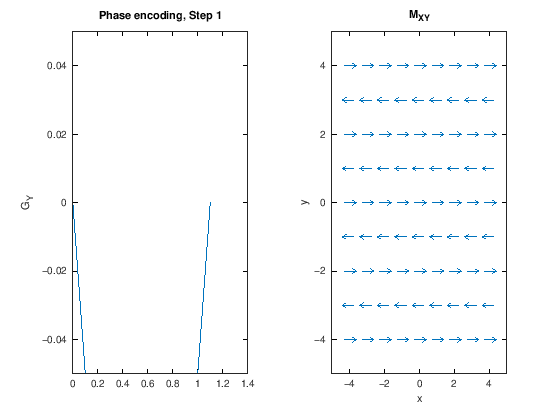

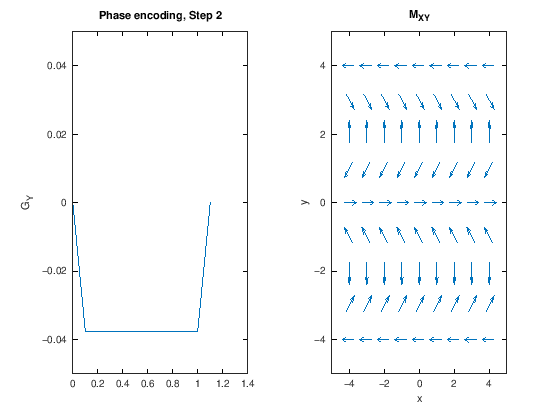

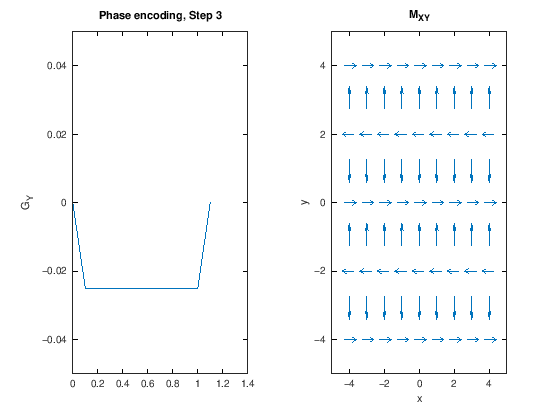

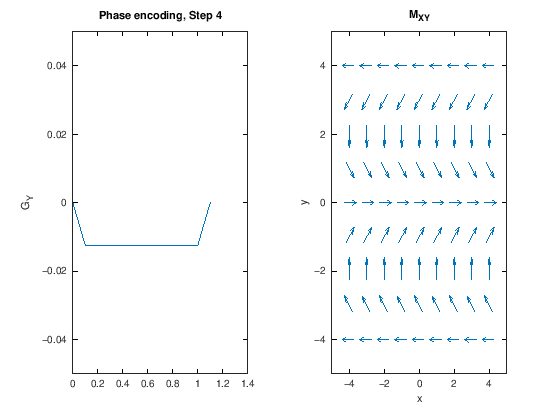

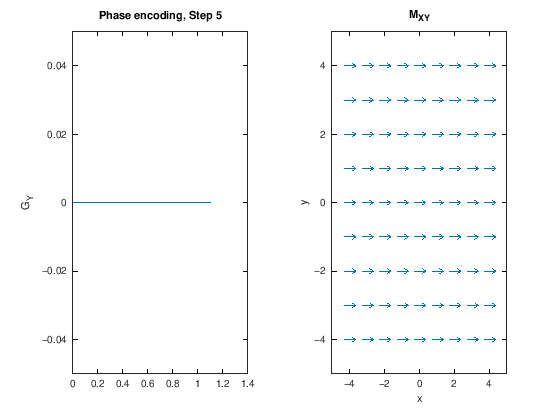

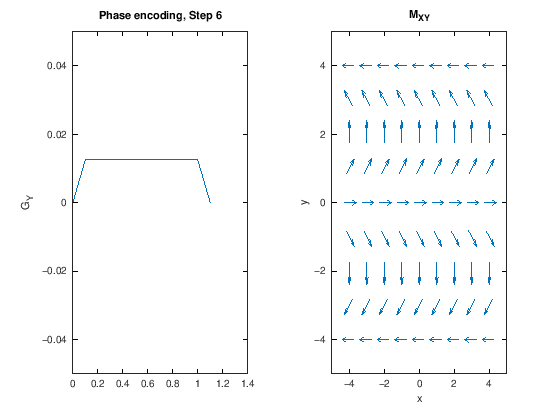

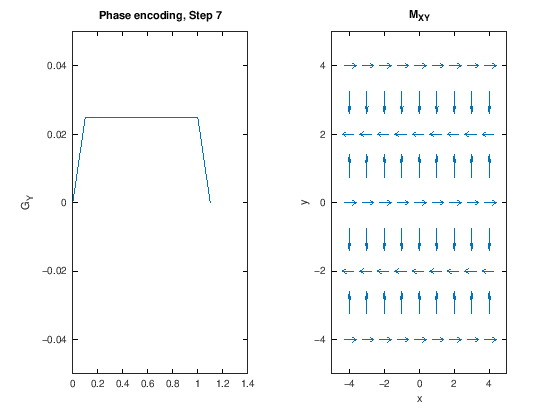

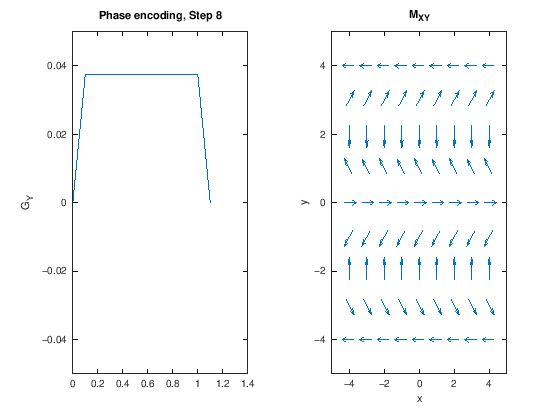

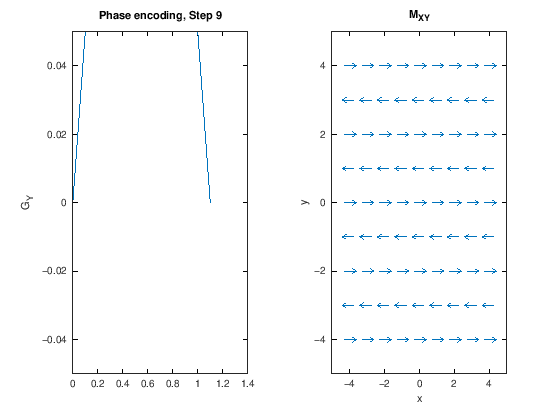

In [2]:
% 2D object
% simulate frequencies + phase encoding

N = 8;
Mxy= ones(N+1,N+1);

x = [-N/2:N/2];
[x,y] = meshgrid(x,x);
Splot = 0.5;

kPE = [-N/2:N/2]/N; %
dt = 0.1;
Tpe = 1;

GAMMA = 42.58;

for Ipe = 1:length(kPE)
    
    for tpe = Tpe %[0:dt:Tpe]
        phase_y = 2*pi*kPE(Ipe)*y *tpe/Tpe;
        
        Mxy_PE = Mxy .* exp(i*phase_y);
        
        figure(Ipe)
        
        subplot(121)
        plot([0:dt:Tpe+dt], [0, ones(1,Tpe/dt)*kPE(Ipe)/(Tpe/dt), 0]), ylim([-0.05 0.05]), ylabel('G_Y') 
        title(['Phase encoding, Step ' int2str(Ipe)])
        subplot(122)
        quiver(x-real(Mxy_PE)*Splot/2,y-imag(Mxy_PE)*Splot/2,real(Mxy_PE), imag(Mxy_PE), Splot)
        xlabel('x'), ylabel('y')
        xlim([-N/2-1, N/2+1])
        ylim([-N/2-1, N/2+1])
        title('M_{XY}')
        drawnow
    end
end

## Frequency and Phase Encoding

The following simulation of the net magnetizations shows how first the phase encoding gradient ($G_Y$) creates some phase variation in $y$, and then during the frequency encoding gradient ($G_X$) the net magnetizations rotate at varying frequencies depending on their $x$ position:

![frequency_phase_encoding-simple-Mxy.gif](images/frequency_phase_encoding-simple-Mxy.gif)

Instead of viewing the net magnetizations, we can also visualize this encoding as a map of the phase of the transverse magnetization:

![frequency_phase_encoding-simple-image_phase.gif](images/frequency_phase_encoding-simple-image_phase.gif)

(See ``spatial_encoding_Mxy_illustration.m`` for code generating this movie)

## K-space Trajectories

K-space is a very general method for capturing the effect of spatial encoding gradients, and the "k-space trajectory" is defined as the pattern created over time by the gradients:

$$\vec{k}(t) = \frac{\gamma}{2\pi} \int_0^t \vec{G}(\tau) d\tau$$

Note that k-space trajectories always start at the center of k-space, $\vec{k}(0) = 0$ and are only defined once there is transverse magnetization (e.g. after an RF pulse).

The following simulation of the net magnetizations shows how rotations and k-space trajectory during a typical Cartesian (or 2D FT) gradient pulse sequence, which is differs from the simulation above in that an initial dephasing gradient in the frequency encoding direction is applied to sample both positive and negative spatial frequencies in k-space:

![frequency_phase_encoding-full-Mxy.gif](images/frequency_phase_encoding-full-Mxy.gif)

![frequency_phase_encoding-full-image_phase.gif](images/frequency_phase_encoding-full-image_phase.gif)

(See ``spatial_encoding_Mxy_illustration.m`` for code generating this movie)

### K-space trajectories

The k-space pattern during a MRI experiment is referred to as the k-space "trajectory".  The most common are Cartesian trajectories, in which parallel lines of k-space are covered to sample a 2D (or 3D) grid.  K-space trajectories with other patterns, such as radial lines, spirals, rastered lines (echo-planar trajectories), or blades can also be used. 

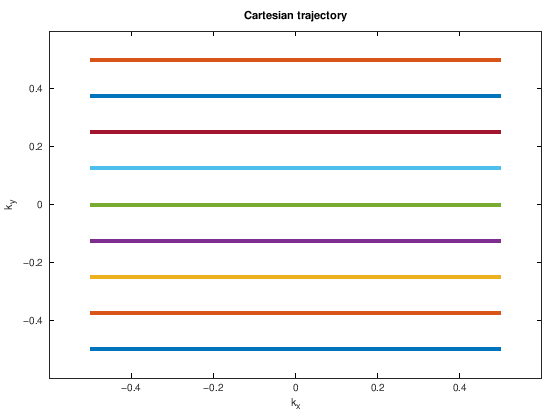

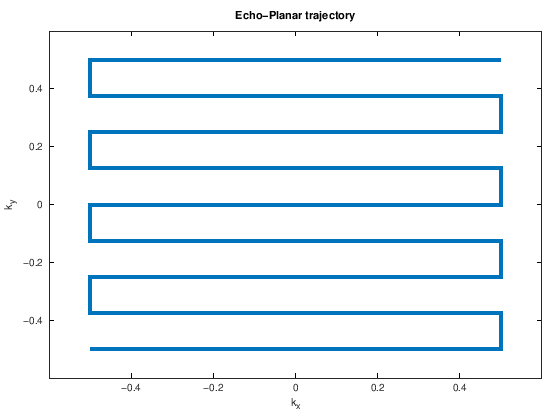

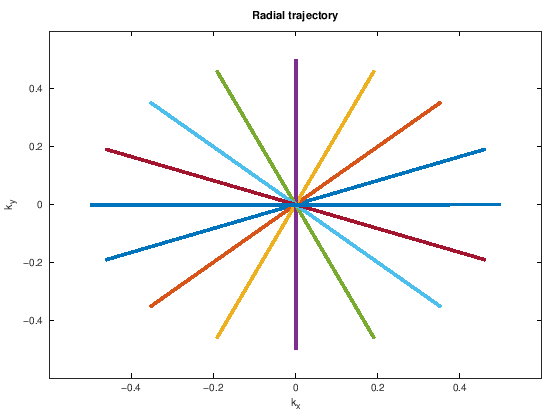

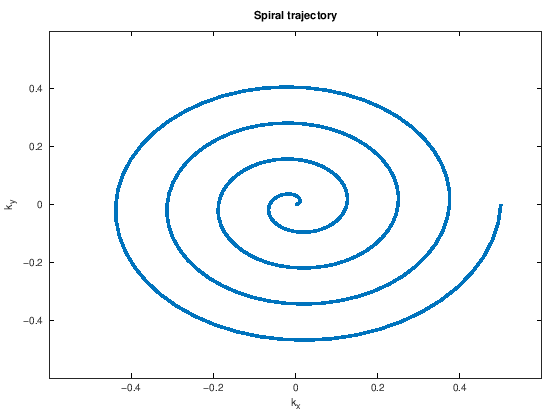

In [18]:
%  plot 2D k-space trajectories

% Cartesian
N = 8;

k = [-N/2:N/2]/N;
[ky,kx] = meshgrid(k,k);

figure
plot(kx, ky, 'LineWidth',10), xlim([-.6 .6]), ylim([-.6 .6])
xlabel('k_x'),ylabel('k_y')
title('Cartesian trajectory')

% echo-planar
kx_ep = kx; kx_ep(:,2:2:end) = kx_ep(end:-1:1,2:2:end);
kx_ep = kx_ep(:);

ky_ep = ky(:);

figure
plot(kx_ep, ky_ep, 'LineWidth',10), xlim([-.6 .6]), ylim([-.6 .6])
xlabel('k_x'),ylabel('k_y')
title('Echo-Planar trajectory')

% radial

k_theta = exp(i*2*pi*[1:N]/(2*N));
k_radial = k.' * k_theta;

figure
plot(real(k_radial), imag(k_radial), 'LineWidth',10), xlim([-.6 .6]), ylim([-.6 .6])
xlabel('k_x'),ylabel('k_y')
title('Radial trajectory')


% spiral
n = linspace(0,1,201);
Nturns = N/2;
k_spiral = 1/2*n.*exp(i*2*pi*Nturns*n);

figure
plot(real(k_spiral), imag(k_spiral), 'LineWidth',10), xlim([-.6 .6]), ylim([-.6 .6])
xlabel('k_x'),ylabel('k_y')
title('Spiral trajectory')



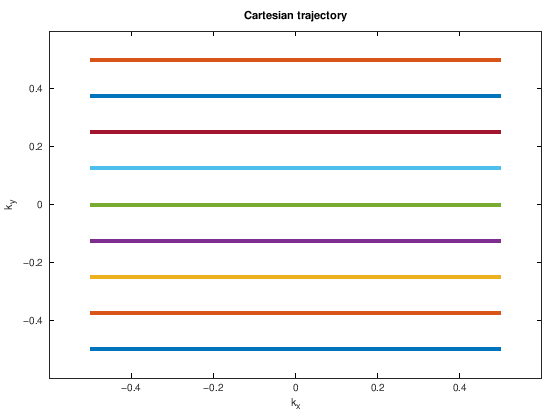

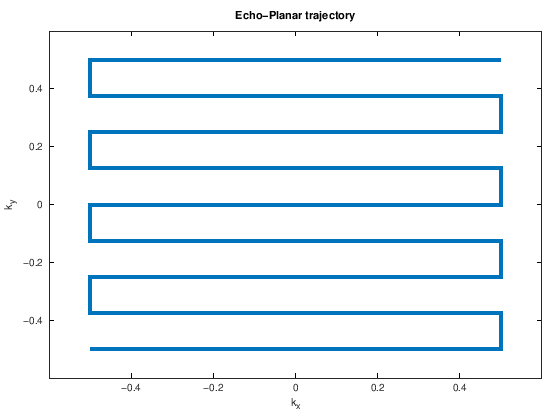

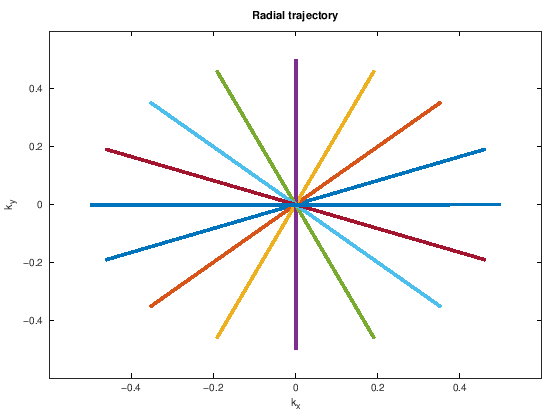

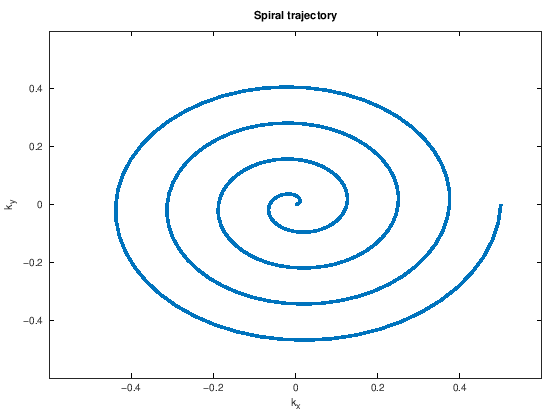

In [ ]:
%  plot 3D k-space trajectories

% Cartesian
N = 8;

k = [-N/2:N/2]/N;
[ky,kx,kz] = meshgrid(k,k,k);


figure
plot3(reshape(kx, [N+1 (N+1)^2]), reshape(ky, [N+1 (N+1)^2]), reshape(kz, [N+1 (N+1)^2]), 'LineWidth',10)
xlim([-.6 .6]), ylim([-.6 .6]), zlim([-.6 .6])
xlabel('k_x'),ylabel('k_y'), zlabel('k_z')
title('Cartesian trajectory')

% radial

N_radial = N^3;

n = 1:N_radial;

kz = (2*n - N_radial - 1) / N_radial;
kx = cos(sqrt(N_radial*pi) .* asin(kz)) .* sqrt(1-kz.^2);
ky = sin(sqrt(N_radial*pi) .* asin(kz)) .* sqrt(1-kz.^2);

figure
plot3([zeros(1,N_radial); kx], [zeros(1,N_radial); ky], [zeros(1,N_radial); kz])
xlim([-.6 .6]), ylim([-.6 .6]), zlim([-.6 .6])
xlabel('k_x'),ylabel('k_y'), zlabel('k_z')
title('Radial trajectory')

These movies illustrate the phase accumulation during non-Cartesian trajectories

![radial_encoding-full-Mxy.gif](images/radial_encoding-full-Mxy.gif)

![spiral_encoding-full-Mxy.gif](images/spiral_encoding-full-Mxy.gif)

(See ``spatial_encoding_Mxy_illustration.m`` for code generating this movie)